In [1]:
!pip install networkx[default]

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import networkx as nx

In [3]:
# Create an empty graph
G = nx.DiGraph()
# Add nodes for each person
people = ["Moh", "Sarah", "Mike", "Emily", "David"]
G.add_nodes_from(people)
# Add edges to connect individuals who know each other
edges = [("Moh", "Sarah"), ("Moh", "Mike"), ("Moh",
"Emily"), ("Sarah", "David"), ("Mike", "David"), ("Emily", "David")]
G.add_edges_from(edges)
# Add directed edges if you introduced two people
introductions = [("Moh", "Sarah"), ("Moh", "Mike")]
G.add_edges_from(introductions)

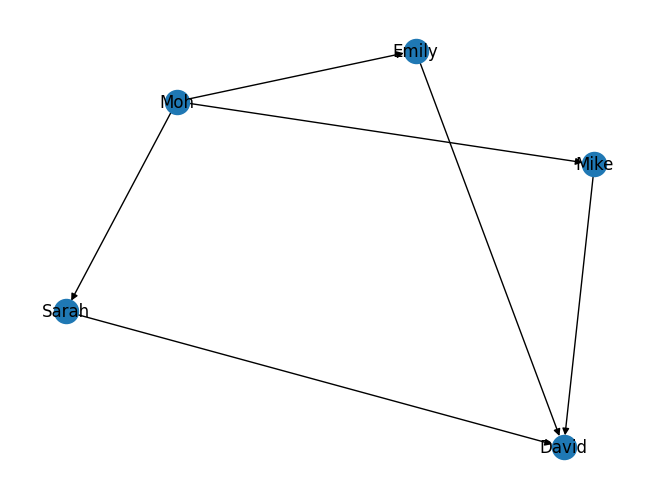

In [4]:
import matplotlib.pyplot as plt
# Visualize the network graph
nx.draw(G, with_labels=True)
plt.show()

In [5]:
# Apply Louvain Modularity community detection algorithm
communities = nx.community.modularity_max.greedy_modularity_communities(G)
# Print out the identified communities
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")
    # Apply girvan_newman community detection algorithm
    communities2 = nx.community.girvan_newman(G)
    # Print out the identified communities
for i, community in enumerate(communities2):
    print(f"Community {i+1}: {community}")

Community 1: frozenset({'Emily', 'David', 'Sarah'})
Community 2: frozenset({'Moh', 'Mike'})
Community 1: ({'Moh', 'Emily', 'David', 'Mike'}, {'Sarah'})
Community 2: ({'Moh', 'Emily'}, {'Sarah'}, {'David', 'Mike'})
Community 3: ({'Moh'}, {'Sarah'}, {'David', 'Mike'}, {'Emily'})
Community 4: ({'Moh'}, {'Sarah'}, {'Mike'}, {'Emily'}, {'David'})


In [6]:
# Calculate basic network statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
print("Basic Network Statistics:")
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Density: {density}")

Basic Network Statistics:
Number of Nodes: 5
Number of Edges: 6
Density: 0.3


In [29]:
import pandas as pd
data=pd.read_csv('Epinions1_dataset-2024.txt', sep='\t', header=None, names=['FromNodeID', 'ToNodeID'])

display(data.head())

,FromNodeID,ToNodeID
0,0,4
1,0,5
2,0,7
3,0,8
4,0,9


C:\Users\652951\AppData\Local\Temp\ipykernel_8908\246949729.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, 2*10**2])


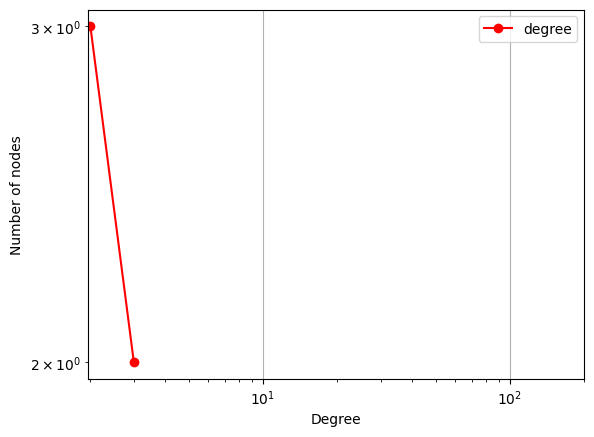

In [8]:

degrees = G.degree() # dictionary node:degree
values = sorted(set(dict(degrees).values()))
hist = [list(dict(degrees).values()).count(x) for x in values]
plt.figure() 
plt.grid(True)
plt.loglog(values, hist, 'ro-') # changing the scale to keep the data readable.
plt.legend(['degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.xlim([0, 2*10**2])
plt.show()

In [10]:
degree_centrality = nx.degree_centrality(G)
highest_degree_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Nodes with the Highest Degree Centrality:")
for node, centrality in highest_degree_nodes:
    print(f"{node}: {centrality}")
    # Closeness Centrality
    closeness_centrality = nx.closeness_centrality(G)
    highest_closeness_nodes = sorted(closeness_centrality.items(),
    key=lambda x: x[1], reverse=True)[:5]
    print("\nNodes with the Highest Closeness Centrality:")
for node, centrality in highest_closeness_nodes:
    print(f"{node}: {centrality}")
    # Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(G)
    highest_betweenness_nodes = sorted(betweenness_centrality.items(),
    key=lambda x: x[1], reverse=True)[:5]
    print("\nNodes with the Highest Betweenness Centrality:")
for node, centrality in highest_betweenness_nodes:
    print(f"{node}: {centrality}")
    # Eigenvector Centrality
    eigenvector_centrality = nx.eigenvector_centrality(G)
    highest_eigenvector_nodes = sorted(eigenvector_centrality.items(),
    key=lambda x: x[1], reverse=True)[:5]
    print("\nNodes with the Highest Eigenvector Centrality:")
for node, centrality in highest_eigenvector_nodes:
    print(f"{node}: {centrality}")
    # PageRank
    pagerank = nx.pagerank(G)
    highest_pagerank_nodes = sorted(pagerank.items(), key=lambda x: x[1],
    reverse=True)[:5]
    print("\nNodes with the Highest PageRank:")
for node, centrality in highest_pagerank_nodes:
    print(f"{node}: {centrality}")

Nodes with the Highest Degree Centrality:
Moh: 0.75

Nodes with the Highest Closeness Centrality:
David: 0.75

Nodes with the Highest Closeness Centrality:
Sarah: 0.5

Nodes with the Highest Closeness Centrality:
Mike: 0.5

Nodes with the Highest Closeness Centrality:
Emily: 0.5

Nodes with the Highest Closeness Centrality:
David: 0.8

Nodes with the Highest Betweenness Centrality:
Sarah: 0.25

Nodes with the Highest Betweenness Centrality:
Mike: 0.25

Nodes with the Highest Betweenness Centrality:
Emily: 0.25

Nodes with the Highest Betweenness Centrality:
Moh: 0.0

Nodes with the Highest Betweenness Centrality:
Sarah: 0.027777777777777776


PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [12]:
# Apply community detection algorithm
communities = nx.algorithms.community.greedy_modularity_communities(G)
# Explore the modularity and cohesion of communities
modularity = nx.algorithms.community.modularity(G, communities)
num_communities = len(communities)
average_community_size = sum(len(community) for community in
communities) / num_communities
print("Community Detection Results:")
print(f"Number of Communities: {num_communities}")
print(f"Average Community Size: {average_community_size}")
print(f"Modularity: {modularity}")


Community Detection Results:
Number of Communities: 2
Average Community Size: 2.5
Modularity: 0.11111111111111108


In [15]:
algorithms = [ "Louvain Modularity", "Label Propagation"]
# Dictionary to store communities detected by each algorithm
detected_communities = {}
# Apply each community detection algorithm and store the detected
communities
for algorithm in algorithms:
    if algorithm == "Louvain Modularity":
        communities = nx.algorithms.community.greedy_modularity_communities(G)
    elif algorithm == "Label Propagation":
        communities = nx.algorithms.community.label_propagation_communities(G)
    detected_communities[algorithm] = communities
    print ('community detection done')
    # Evaluate and compare the results
for algorithm, communities in detected_communities.items():
    modularity = nx.algorithms.community.modularity(G, communities)
    num_communities = len(communities)
    average_community_size = sum(len(community) for community in
    communities) / num_communities
    print(f"{algorithm}:")
    print(f"Modularity: {modularity}")
    print(f"Number of Communities: {num_communities}")
    print(f"Average Community Size: {average_community_size}\n")
    # Visualize community structures
    plt.figure(figsize=(15, 10))
    pos = nx.spring_layout(G)
for i, (algorithm, communities) in enumerate(detected_communities.items()):
    plt.subplot(2, 2, i+1)
    colors = [f'C{i}' for i in range(len(communities))]
for j, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community,
    node_color=colors[j], node_size=20)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title(algorithm)
    plt.tight_layout()
    plt.show()

community detection done


NetworkXNotImplemented: not implemented for directed type

In [27]:
def data_graph(dataset, delimiter):
    
    data = pd.read_csv(dataset, delimiter=delimiter)
    print(data.shape)
    data.columns = ['From','Weight']

    print(data.head())
    
    graph = nx.DiGraph()
    # Adding the edges.
    for index,row in data.iterrows():
        graph.add_edges_from(row[0],weight = row[1])
    
    return data, graph

In [28]:
data, graph = data_graph('Epinions1_dataset-2024.txt',"\t")

(53209, 2)
   From  Weight
0     0       5
1     0       7
2     0       8
3     0       9
4     0      10


TypeError: 'numpy.int64' object is not iterable